<a href="https://colab.research.google.com/github/rosmapeb/Doc/blob/main/Correlaci%C3%B3n_estad%C3%ADstica_y_Autocorrelaci%C3%B3n_espacial_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlación estadística y Autocorrelación espacial
## Análisis espacial
#### Rosa Martha Peralta Blanco
#### Elida María Leiva González
---



In [1]:
pip install -q geopandas #-q para omitir texto de pip

In [2]:
pip install -q pysal

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/243.1 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [3]:
pip install -q contextily

In [4]:
import warnings
warnings.filterwarnings('ignore')


In [5]:
from google.colab import drive
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pysal
import contextily as cx
import matplotlib.patches as mpatches

In [6]:
import esda #esta es la libreria que carga las herramientas de la autocorrelacion espacial
from pysal.lib import weights #este instancia carga la herramienta para obtener pesos
from libpysal.weights import KNN #esta instancia permite calcular los vecinos óptimos
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation #Estainstancia nos ayudará a visualizar nuestra autocorrelación

In [7]:
drive.mount('/content/drive/')
%cd '/content/drive/My Drive/Colab Notebooks/AnalisisEspacial_Doctorado'

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/AnalisisEspacial_Doctorado


In [8]:
h3=gpd.read_file('h3_6_granjas_32616.zip')
edo=gpd.read_file('31ent_NoIslas_32616.zip')
mun=gpd.read_file('31mun32616.zip')

In [9]:
h3=h3[h3['NUMPOINTS']!= 0]

Text(0.5, 1.0, 'División política municipal')

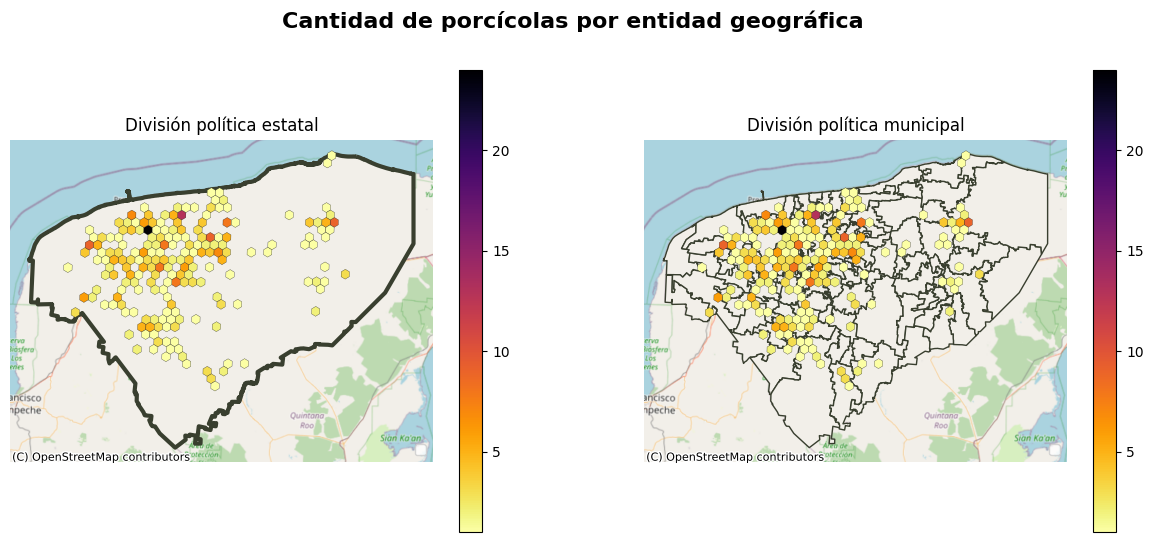

In [17]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Cantidad de porcícolas por entidad geográfica', size=16, weight=900)
edo.plot(edgecolor= '#393F2F', linewidth = 3, ax=axs[0], facecolor="#F2EFE9")
mun.plot(edgecolor= '#393F2F', linewidth = 1, ax=axs[1], facecolor="#F2EFE9")
cx.add_basemap(axs[0], crs=edo.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
cx.add_basemap(axs[1], crs=edo.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
axs[0].set_axis_off()
axs[1].set_axis_off()
h3.plot(column = 'NUMPOINTS', cmap = "inferno_r", ax=axs[0], linewidth = .2, edgecolor="#0E0E0E", legend=True)
h3.plot(column = 'NUMPOINTS', cmap = "inferno_r", ax=axs[1], linewidth = .2, edgecolor="#0E0E0E", legend=True)
axs[0].legend(loc='lower right')
axs[1].legend(loc='lower right')
axs[0].set_title("División política estatal")
axs[1].set_title("División política municipal")

#h3.plot()
#gr.plot()

In [11]:
h3.tail(5)

,h3_polyfil,index,CVEGEO,CVE_ENT,NOMGEO,NUMPOINTS,geometry
1029,86450d75fffffff,0,31,31,Yucatán,3.0,"POLYGON ((258804.614 2253582.249, 255616.542 2..."
1031,86450d41fffffff,0,31,31,Yucatán,2.0,"POLYGON ((296701.156 2219105.601, 293528.11 22..."
1046,864572487ffffff,0,31,31,Yucatán,4.0,"POLYGON ((220984.35 2299870.483, 217781.176 23..."
1059,8645098f7ffffff,0,31,31,Yucatán,2.0,"POLYGON ((256755.525 2305779.057, 253564.815 2..."
1063,864509d47ffffff,0,31,31,Yucatán,2.0,"POLYGON ((278967.907 2288445.747, 275785.721 2..."


In [12]:
def optimo (variable,campo,numvecinos, ax=None):

  if ax is None:
    fig, ax = plt.subplots(figsize=(4, 6))

  # Probar distintos valores de k
  k_vecinos = range(1, numvecinos+2)
  moran_score = []
  sig=[]

  for k in k_vecinos:
      w = KNN.from_dataframe(variable, k=k) #Obtiene pesos según el numero de vecinos
      w.transform = 'R' #Normaliza los resultados de W
      y = np.log(variable[campo]) #rezago-lag
      variable['lag']=weights.lag_spatial(w,y)
      moran = esda.Moran(variable['lag'], w) #Obtiene la I de Moran para cada caso
      moran_score.append(moran.I) #Agrega al array de moran_score
      sig.append(moran.p_sim)  # Guardar valores de p
  #print(max(moran_score))
  test_result= pd.DataFrame(np.column_stack((k_vecinos, moran_score, sig)))
  test_result.columns = ['Vecinos', 'IMoran', 'Significación']
  #print(test_result.sort_values(by='IMoran', ascending=False))
  indexmoranmax=test_result.loc[test_result['IMoran']== test_result['IMoran'].max()].index
  vecino_ideal=test_result.iloc[indexmoranmax]['Vecinos'].values[0]
  moranmax=test_result.iloc[indexmoranmax]['IMoran'].values[0]

  # Crear gráfico combinado
  #fig, ax1 = plt.subplots(figsize=(8, 6))

  # Gráfico de I de Moran
  ax.plot(k_vecinos, moran_score, marker='o', color='#2C5A78', label='I de Moran')
  ax.set_xlabel('Número de vecinos (k)')
  #ax.set_ylabel('I de Moran', color='#2C5A78')
  ax.tick_params(axis='y', labelcolor='#2C5A78')
  ax.set_xticks(np.arange(1, numvecinos+1, 1))
  ax.set_ylim(1, numvecinos+1)
  ax.axvline(x=vecino_ideal, color='grey', linestyle='--', linewidth=1, label=f'Máximo= {round(moranmax,2)}')
  ax.set_ylim(0, 0.8)

  # Gráfico de la significancia en el mismo eje
  ax2 = ax.twinx()
  ax2.plot(k_vecinos, sig, marker='X', color='#8A3538', label='Significación')
  #ax2.set_ylabel('Significación', color='#8A3538')
  ax2.tick_params(axis='y', labelcolor='#8A3538')
  ax2.set_ylim(0, 0.0034)

  # Títulos y leyendas
  titulo_grafico = f'Los vecinos óptimos para esta variable son {int(vecino_ideal)}'
  ax.set_title(titulo_grafico)
  ax.legend(loc='upper left')
  ax2.legend(loc='upper right')
  #grafico=plt.show()
  #print('Los vecinos ideales para esta variable son', int(test_result.iloc[indexmoranmax]['Vecinos'].values[0]))
  return ax

In [13]:
def moranlisa (capa, campo, edo, numvecinos):
  #Para eliminar valores nulos o ceros
  if min(capa[campo]) == 0:
    variable=capa[capa[campo]!= 0]
  else:
    variable=capa
  # Calcular pesos
  w = weights.KNN.from_dataframe(variable, k=numvecinos)
  w.transform= 'R'
  #Para obtener el lag (promedio de los j-esimos)
  y = np.log(variable[campo])
  variable['lag']=weights.lag_spatial(w,y)
  #Obtener I de Morán
  moran= esda.Moran(variable['lag'],w)
  moranMC= esda.Moran(variable['lag'],w, permutations= 999)
  #Obtener LISA y agregar datos al GDF original
  lisa=esda.Moran_Local(variable['lag'],w, permutations= 999)
  variable['significancianum']=lisa.p_sim
  variable['significancia']=lisa.p_sim<=0.001  #Para hot y coldspot, definidos por un nivel de confianza de 99.9%, dejando que 0.01% de probabilidad de que sea un valor aleatorio
  variable['cuadrante']=lisa.q #Valores: 1 es HH, 2 es LH, 3 es LL, 4 es HL
  #Salida final
  #Colores mapa LISA
  color_lisa={1:'#FD0000', 2:'#4287B5', 3:'#0000FD', 4:'#D05054'}
  variable['colorlisa'] = variable['cuadrante'].map(color_lisa)
  legend_lisa = [ mpatches.Patch(color='#FD0000', label='Alto-Alto'), mpatches.Patch(color='#4287B5', label='Bajo-Alto'), mpatches.Patch(color='#0000FD', label='Bajo-Bajo'), mpatches.Patch(color='#D05054', label='Alto-Bajo')]
  #Colores mapa significación
  color_sig={1:'#012602', 2:'#06C40B', 3:'#7FFF83', 4:'#787878'}
  variable['colorsig'] = np.select ( [variable['significancianum']<= 0.001, (variable['significancianum'] > 0.001) & (variable['significancianum'] <= 0.01), (variable['significancianum'] > 0.01) & (variable['significancianum'] <= 0.05)], [1,2,3], default= 4)
  variable['colorsig2'] = variable['colorsig'].map(color_sig)
  legend_sig = [ mpatches.Patch(color='#7FFF83', label='p<=0.05'), mpatches.Patch(color='#06C40B', label='p<=0.01'), mpatches.Patch(color='#012602', label='p<=0.001'), mpatches.Patch(color='#787878', label='No significativo')]
  #colores mapa hotspot
  variable['colorht'] = np.select( [variable['significancianum']<= 0.001], [variable['cuadrante'].map(color_lisa)], default= '#787878')

  #Grafico
  fig, axs = plt.subplots(2, 3, figsize=(26, 11))
  # VECINO OPTIMO
  optimo(variable,campo,numvecinos, ax=axs[0,0])
  # MORAN
  moran_scatterplot(moran, ax=axs[0,1])
  # MORAN MONTECARLO
  moranMC.plot_simulation(fitline_kwds={"color": "k"}, color="grey", ax=axs[0,2])
  # LISA
  edo.plot(edgecolor= '#393F2F', linewidth = 3, facecolor="#F2EFE9", ax=axs[1,0])
  variable.plot(column = 'cuadrante', color=variable['colorlisa'], linewidth = .2, edgecolor="#0E0E0E", ax=axs[1,0])
  cx.add_basemap(axs[1,0], crs=edo.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
  axs[1,0].set_axis_off()
  axs[1,0].legend(handles=legend_lisa, loc='lower right')#, title="Clústeres LISA")
  axs[1,0].set_title("LISA")
  # SIGNIFICANCIA
  edo.plot(edgecolor= '#393F2F', linewidth = 3, facecolor="#F2EFE9", ax=axs[1,1])
  variable.plot(column = 'colorsig', color=variable['colorsig2'], linewidth = .2, edgecolor="#0E0E0E", ax=axs[1,1])
  cx.add_basemap(axs[1,1], crs=edo.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
  axs[1,1].set_axis_off()
  axs[1,1].legend(handles=legend_sig, loc='lower right')#, title="Clústeres LISA")
  axs[1,1].set_title("Significancia")
  # HOTSPOT - COLDSPOT
  edo.plot(edgecolor= '#393F2F', linewidth = 3, facecolor="#F2EFE9", ax=axs[1,2])
  variable.plot(column = 'cuadrante', color=variable['colorht'], linewidth = .2, edgecolor="#0E0E0E", ax=axs[1,2])
  cx.add_basemap(axs[1,2], crs=edo.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
  axs[1,2].set_axis_off()
  axs[1,2].legend(handles=legend_lisa, loc='lower right')#, title="Clústeres LISA")
  axs[1,2].set_title("Hotspot y coldspot")
  plt.tight_layout() #Ajusta todos los subplots

  return plt.show()#, print(dir(lisa))

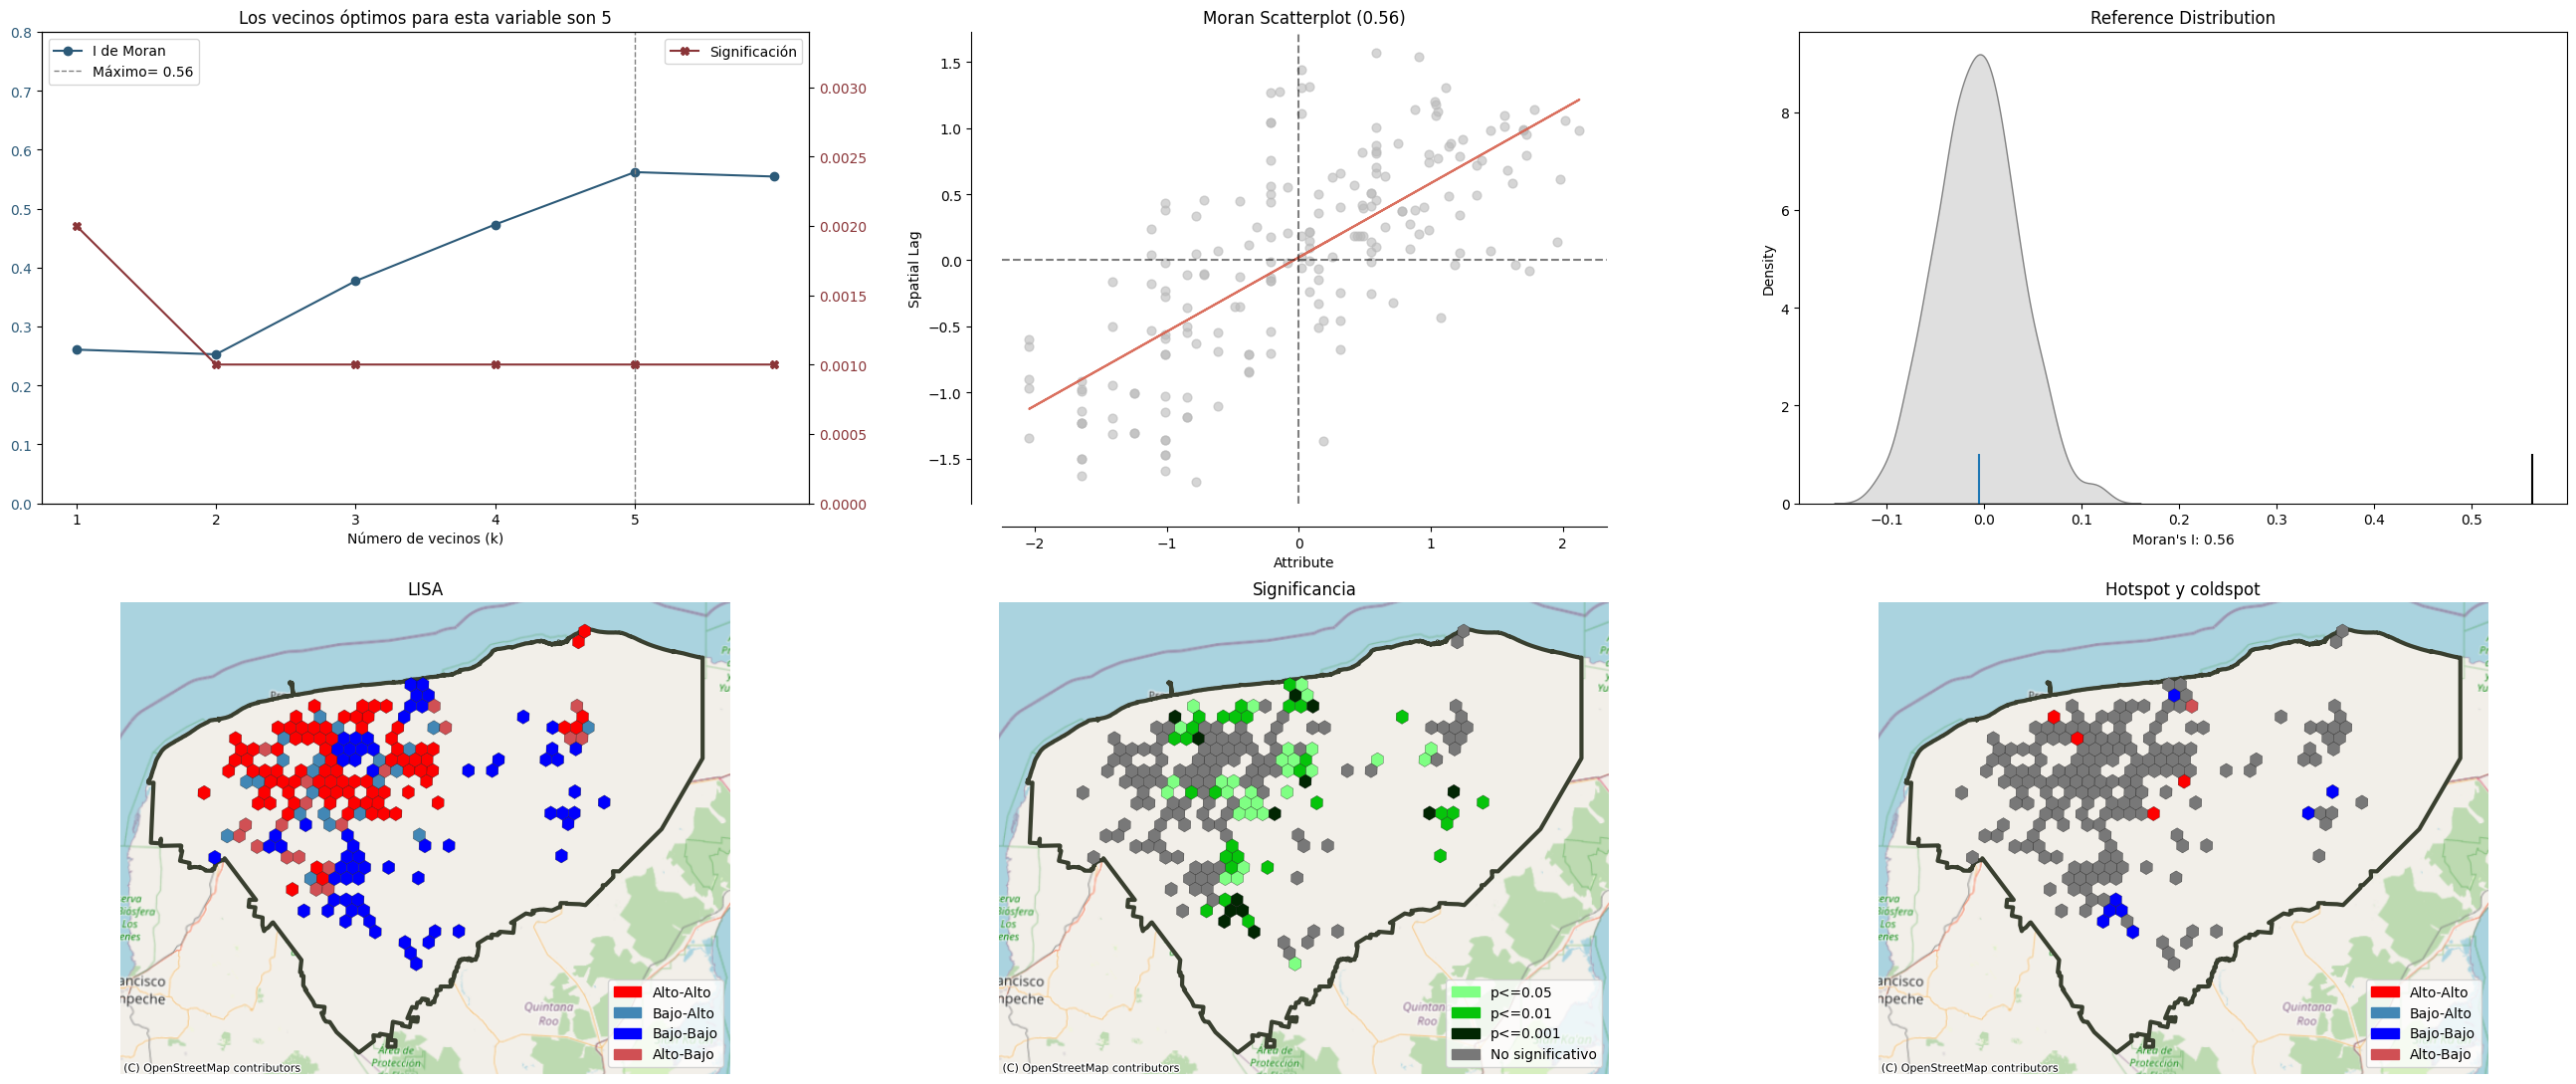

In [14]:
moranlisa(h3, 'NUMPOINTS', edo, 5) #para el primer grafico se evalúan los valores de Moran del 1 al 6 dado que un hexagono solo puede tener 6 vecinos


In [15]:
h3.head(3)

,h3_polyfil,index,CVEGEO,CVE_ENT,NOMGEO,NUMPOINTS,geometry,lag,significancianum,significancia,cuadrante,colorlisa,colorsig,colorsig2,colorht
10,864509137ffffff,0,31,31,Yucatán,1.0,"POLYGON ((273046.963 2311622.069, 269861.838 2...",0.797915,0.290,False,4,#D05054,4,#787878,#787878
18,864509077ffffff,0,31,31,Yucatán,13.0,"POLYGON ((264022.86 2340634.239, 260833.566 23...",0.845862,0.002,False,1,#FD0000,2,#06C40B,#787878
23,864509af7ffffff,0,31,31,Yucatán,1.0,"POLYGON ((235011.045 2346432.591, 231811.338 2...",1.200568,0.012,False,1,#FD0000,3,#7FFF83,#787878


In [16]:
#Guardar resultados
h3.to_file('lisa_'+ 'h3FINAL' +'.shp')